Provided example uses toy data. You can access the real [UK travel survey from 2002-2021](https://beta.ukdataservice.ac.uk/datacatalogue/studies/study?id=5340) from the [UK Data Service](https://beta.ukdataservice.ac.uk).

In [1]:
from pathlib import Path

import pandas as pd
import networkx as nx

from ntsx import load, core, ops
from ntsx.plot import plot

from copy import deepcopy

In [2]:
dir = Path("data/dummyNTS/")
trips_csv = dir / "trips.tab"
attributes_csv = dir / "individuals.tab"
hhs_csv = dir / "households.tab"

years = [2021]

write_dir = Path("tmp")
write_dir.mkdir(exist_ok=True)

In [3]:
trips = load.trips(trips_csv, years=years)
trips.head(10)

,tid,year,day,iid,hid,seq,mode,oact,dact,freq,tst,tet,ozone,dzone,did,pid
0,1,2021,2,1,1,1,car,home,social,0.989618,675,683,7,7,1,1_1
1,2,2021,2,1,1,2,car,social,other,1.002945,720,735,7,7,1,1_1
2,3,2021,2,1,1,3,car,other,social,0.989618,770,780,7,7,1,1_1
3,4,2021,2,1,1,4,taxi,social,home,0.989618,1110,1130,7,7,1,1_1
4,5,2021,3,1,1,1,car,home,social,0.999891,760,770,7,7,2,1_1
5,6,2021,3,1,1,2,car,social,social,0.999891,790,805,7,7,2,1_1
6,7,2021,3,1,1,3,car,social,other,1.061665,810,825,7,7,2,1_1
7,8,2021,3,1,1,4,car,other,other,1.061665,845,852,7,7,2,1_1
8,9,2021,3,1,1,5,car,other,social,0.999891,865,873,7,7,2,1_1
9,10,2021,3,1,1,6,car,social,escort,1.006313,908,914,7,7,2,1_1


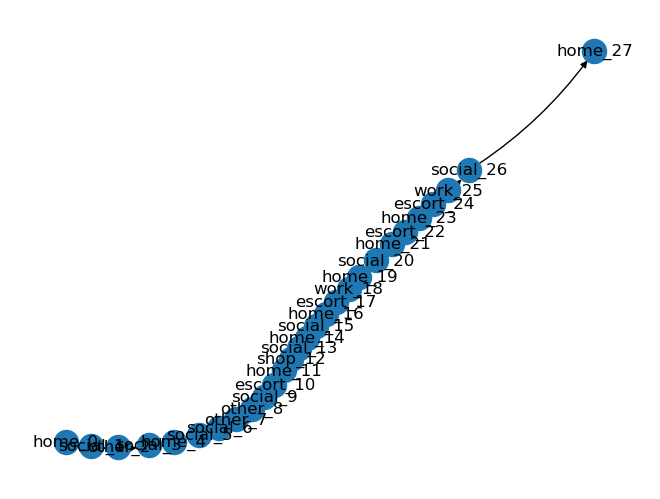

In [4]:
iid = 1
g = core.to_nx(iid, trips.loc[trips.iid == iid])
plot(g)

Could not find any education activities.


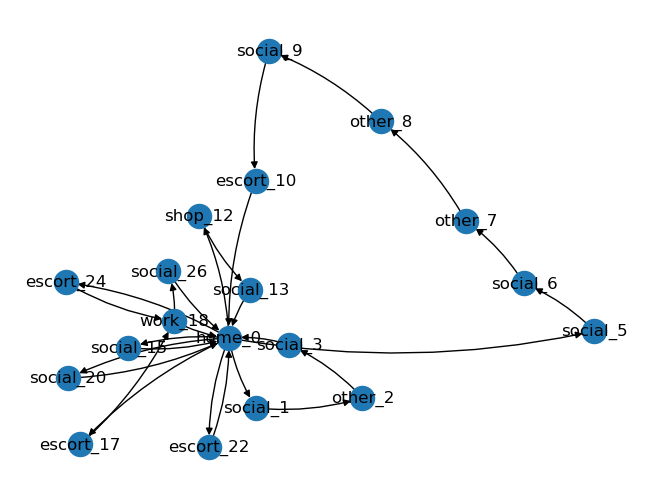

In [5]:
g_anchored = ops.anchor_activities(g, ["home", "work", "education"])
plot(g_anchored)


0 1
{0: {'duration': 480, 'tst': datetime.timedelta(days=2, seconds=40500), 'tet': datetime.timedelta(days=2, seconds=40980), 'travel': 'car'}}
0 5 {0: {'duration': 600, 'tst': datetime.timedelta(days=3, seconds=45600), 'tet': datetime.timedelta(days=3, seconds=46200), 'travel': 'car'}}

0 1
{0: {'duration': 480, 'tst': datetime.timedelta(days=2, seconds=40500), 'tet': datetime.timedelta(days=2, seconds=40980), 'travel': 'car'}}
0 15 {0: {'duration': 900, 'tst': datetime.timedelta(days=5, seconds=46200), 'tet': datetime.timedelta(days=5, seconds=47100), 'travel': 'car'}}

0 1
{0: {'duration': 480, 'tst': datetime.timedelta(days=2, seconds=40500), 'tet': datetime.timedelta(days=2, seconds=40980), 'travel': 'car'}}
0 20 {0: {'duration': 180, 'tst': datetime.timedelta(days=6, seconds=73200), 'tet': datetime.timedelta(days=6, seconds=73380), 'travel': 'car'}}

0 5
{0: {'duration': 600, 'tst': datetime.timedelta(days=3, seconds=45600), 'tet': datetime.timedelta(days=3, seconds=46200), 'tra

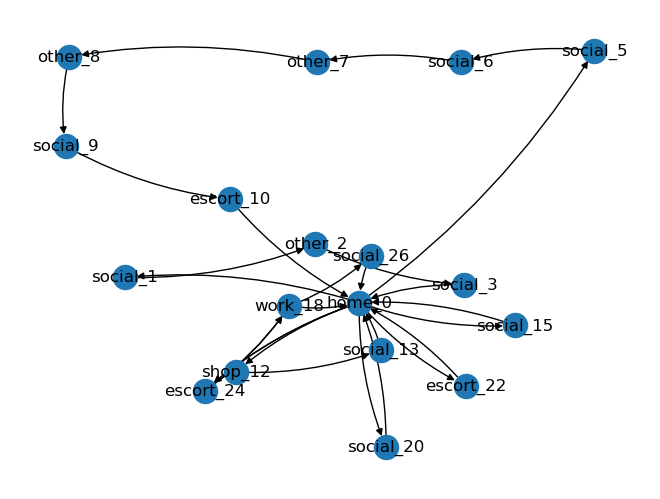

In [6]:
merged_g = ops.merge_similar(g_anchored, respect_direction=True, verbose=True)
plot(merged_g)

In [7]:
merged_g = ops.merge_similar(g_anchored, respect_direction=False, verbose=True)
plot(merged_g)


20 0
{0: {'duration': 300, 'tst': datetime.timedelta(days=6, seconds=76200), 'tet': datetime.timedelta(days=6, seconds=76500), 'travel': 'car'}}
0 1 {0: {'duration': 480, 'tst': datetime.timedelta(days=2, seconds=40500), 'tet': datetime.timedelta(days=2, seconds=40980), 'travel': 'car'}}

20 0
{0: {'duration': 300, 'tst': datetime.timedelta(days=6, seconds=76200), 'tet': datetime.timedelta(days=6, seconds=76500), 'travel': 'car'}}
15 0 {0: {'duration': 720, 'tst': datetime.timedelta(days=5, seconds=54300), 'tet': datetime.timedelta(days=5, seconds=55020), 'travel': 'car'}}

26 0
{0: {'duration': 1020, 'tst': datetime.timedelta(days=7, seconds=66600), 'tet': datetime.timedelta(days=7, seconds=67620), 'travel': 'car'}}
20 0 {0: {'duration': 300, 'tst': datetime.timedelta(days=6, seconds=76200), 'tet': datetime.timedelta(days=6, seconds=76500), 'travel': 'car'}}

26 0
{0: {'duration': 1020, 'tst': datetime.timedelta(days=7, seconds=66600), 'tet': datetime.timedelta(days=7, seconds=67620)

KeyError: 0

In [9]:
g_anchored[0][5]

AtlasView({0: {'duration': 600, 'tst': datetime.timedelta(days=3, seconds=45600), 'tet': datetime.timedelta(days=3, seconds=46200), 'travel': 'car'}})